In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


#dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

#df =  pd.read_csv("Covid19Casos.csv", encoding='utf-16',parse_dates=["fecha_inicio_sintomas","fecha_internacion"],date_parser=dateparse)
df =  pd.read_csv("Covid19Casos.csv", encoding='utf-16')
numerical = [
    "edad", "sepi_apertura"
]

#categorical = ["sexo","edad_años_meses","residencia_pais_nombre","resicidencia_provincia_nombre","residencia_departamento_nombre",
#              "carga_provincia_nombre","fecha_inicio_sintomas","fecha_apertura","fecha_internacion","cuidado_intensivo","fecha_cui_intensivo",
#               "fallecido","fecha_fallecimiento","asistenia_respiratoria_mecanica","carga_provincia_id","origen_financiamento",
#               "Clasificacion","clasificacion_resumen","residencia_provincia_id","fecha_diagnostico","residencia_departamento_id","ultima_actualizacion"]
#print(df.dtypes)

df_var_numericas=df[numerical]
df_var_categoricas=df[filter(lambda column:not(column=="edad" or column=="sepi_apertura")  , df.columns)].astype("category")



In [5]:
def filter_row_by_two_cells_value(df,condition1,condition2):
    
    subsetDataFrame2 = df[(condition1(df) )& (condition2(df) )]
    return subsetDataFrame2

def count_string_in_column(df,column_name,string):
    df2=df[df[column_name]==string]   
    return df2[column_name].count()

In [6]:

df_var_numericas.describe()
   

,edad,sepi_apertura
count,185247.000000,185564.000000
mean,40.784553,19.746179
std,22.367641,3.087021
min,0.000000,5.000000
25%,26.000000,17.000000
50%,38.000000,20.000000
75%,55.000000,22.000000
max,120.000000,44.000000


In [7]:
df_var_categoricas.describe()

,id_evento_caso,sexo,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,Clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
count,185564,185564,185564,185564,185564,185564,185564,123389,185563,50015,...,2202,185564,185564,185564,185564,185564,185564,171856,185564,185564
unique,185564,3,2,20,25,429,24,143,108,118,...,93,2,24,2,14,4,25,104,154,1
top,1047756,F,Años,Argentina,Buenos Aires,SIN ESPECIFICAR,CABA,2020-06-01,2020-06-08,2020-05-20,...,2020-04-27,NO,2,Público,Caso Descartado,Descartado,6,2020-05-29,0,2020-06-09
freq,1,93209,182192,178122,76818,31254,61954,2894,5333,902,...,46,182678,61954,114840,147146,147917,76818,4471,31254,185564


In [8]:
#datos faltantes o nulos cuando corresponde (completitud)
for column in df.columns:
    print(column, df[column].isna().sum())



id_evento_caso 0
sexo 0
edad 317
edad_años_meses 0
residencia_pais_nombre 0
residencia_provincia_nombre 0
residencia_departamento_nombre 0
carga_provincia_nombre 0
fecha_inicio_sintomas 62175
fecha_apertura 1
sepi_apertura 0
fecha_internacion 135549
cuidado_intensivo 0
fecha_cui_intensivo 178086
fallecido 0
fecha_fallecimiento 183362
asistencia_respiratoria_mecanica 0
carga_provincia_id 0
origen_financiamiento 0
Clasificacion 0
clasificacion_resumen 0
residencia_provincia_id 0
fecha_diagnostico 13708
residencia_departamento_id 0
ultima_actualizacion 0


In [9]:
#bivariado cuidado intensivo -  fecha cuidado intensivo (consistencia)
sub_df=df[["cuidado_intensivo","fecha_cui_intensivo"]]
subsetDataFrame = filter_row_by_two_cells_value(sub_df,lambda df:df['cuidado_intensivo'] == 'NO',lambda df:df['fecha_cui_intensivo'].notna() )

print("cantidad de no cuidado intensivo con fecha de cuidado intensivo ",subsetDataFrame.count() )#cantidad de no cuidado intensivo con fecha de cuidado intensivo


subsetDataFrame2 = sub_df[(sub_df['cuidado_intensivo'] == 'SI' )& (sub_df['fecha_cui_intensivo'].isna() )]
print("cantidad de cuidado intensivo sin fecha de cuidado intensivo ",subsetDataFrame2.count() )#cantidad de no cuidado intensivo con fecha de cuidado intensivo


cantidad de no cuidado intensivo con fecha de cuidado intensivo  cuidado_intensivo      52
fecha_cui_intensivo    52
dtype: int64
cantidad de cuidado intensivo sin fecha de cuidado intensivo  cuidado_intensivo      0
fecha_cui_intensivo    0
dtype: int64


In [10]:
#bivariado fallecido - fecha fallecimiento (consistencia/completitu)
sub_df=df[['fallecido',"fecha_fallecimiento"]]
subsetDataFrame= filter_row_by_two_cells_value(sub_df,lambda df:df['fallecido'] == 'NO',lambda df:df['fecha_fallecimiento'].notna() )

subsetDataFrame


,fallecido,fecha_fallecimiento


In [11]:
#contar la cantidad de valor "sin especificar" (completitud)


print("faltantes residencia_provincia_nombre",count_string_in_column(df,"residencia_provincia_nombre","SIN ESPECIFICAR"))

print("faltantes residencia_departamento_nombre" ,count_string_in_column(df,"residencia_departamento_nombre","SIN ESPECIFICAR"))

print("faltantes residencia_pais_nombre" ,count_string_in_column(df,"residencia_pais_nombre","SIN ESPECIFICAR"))

print("paises extranjeros que no especifican prov",df[( df['residencia_pais_nombre']!="Argentina" )&( df['residencia_pais_nombre']!="SIN ESPECIFICAR" )&(df["residencia_departamento_nombre"]=="SIN ESPECIFICAR")].shape[0])

print("caba sin especificar comuna",df[(  df['residencia_departamento_nombre']=="SIN ESPECIFICAR" )&(df["residencia_provincia_nombre"]=="CABA")].shape[0])
print("caba especifico comuna",df[(  df['residencia_departamento_nombre']!="SIN ESPECIFICAR" )&(df["residencia_provincia_nombre"]=="CABA")].shape[0])

faltantes residencia_provincia_nombre 690
faltantes residencia_departamento_nombre 31254
faltantes residencia_pais_nombre 7357
paises extranjeros que no especifican prov 65
caba sin especificar comuna 30057
caba especifico comuna 15189


In [12]:
#analisis descriptivo bivariado cat-cat
#cross table clasificacion-clasificacion resumen (consistencia)
pd.crosstab(df["Clasificacion"],df["clasificacion_resumen"])

clasificacion_resumen,Confirmado,Descartado,Sin Clasificar,Sospechoso
Clasificacion,,,,
Caso Descartado,0,147146,0,0
Caso Invalidado Epidemiologicamente,0,590,0,0
Caso Sospechoso - Muestra no apta,0,0,0,419
Caso Sospechoso - Sin muestra,0,0,0,3594
Caso confirmado - Activo,12216,0,0,0
Caso confirmado - Activo Internado,7018,0,0,0
Caso confirmado - Activo con seguimiento negativo,16,0,0,0
Caso confirmado - Fallecido,717,0,0,0
Caso confirmado - No Activo por criterio de laboratorio,2554,0,0,0


In [13]:
#catidad de dias transcurridos entre inicio sintomas e internacion
#fecha_internacion
#fecha_inicio_sintomas
#date_time_obj = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')

#df2=pd.to_datetime(df[["fecha_inicio_sintomas","fecha_internacion"]],format='%Y-%m-%d')
#df["intervalo"]=df["fecha_inicio_sintomas"]-df["fecha_internacion"]
#df[["fecha_inicio_sintomas","fecha_internacion"]].dtypes
dt.timedelta(7)
df['fecha_inicio_sintomas'] =  pd.to_datetime(df['fecha_inicio_sintomas'], format='%Y-%m-%d')
df['fecha_internacion'] =  pd.to_datetime(df['fecha_internacion'], format='%Y-%m-%d')
df['fecha_diagnostico'] =  pd.to_datetime(df['fecha_diagnostico'], format='%Y-%m-%d')
df['fecha_cui_intensivo'] =  pd.to_datetime(df['fecha_cui_intensivo'], format='%Y-%m-%d')
df2 = (df['fecha_internacion']-df['fecha_internacion']).dt.days
df2.describe()
#df["fecha_inicio_sintomas"]
df3 = (df['fecha_cui_intensivo']-df['fecha_internacion']).dt.days
df3.describe()

count    7369.000000
mean        0.415796
std         2.362908
min       -56.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        90.000000
dtype: float64

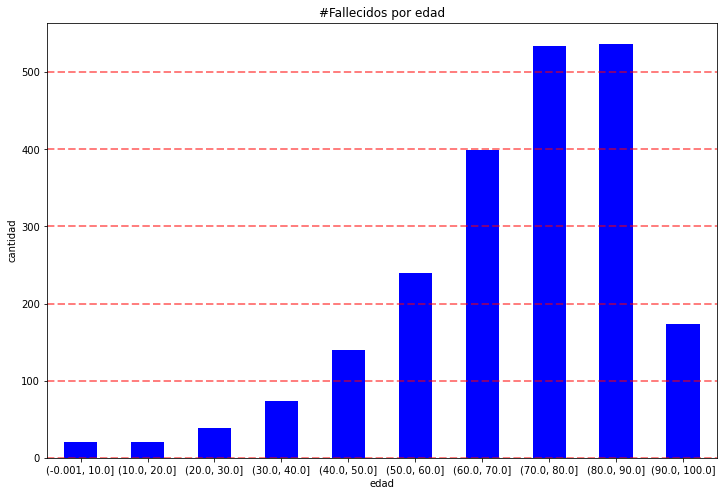

In [61]:
con_edad = df[df['edad'].notna()]
edad_fallecidos = con_edad.loc[(con_edad['fallecido'] == 'SI') & (con_edad['edad_años_meses'] == 'Años'), :]

# split in bins of 10 years each
bins = np.arange(0, 110, 10)
out = pd.cut(edad_fallecidos['edad'], bins=bins, include_lowest=True)

ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(12,8))
ax.grid(axis='y', alpha=0.5, color='red', linestyle='--', linewidth=2)
ax.set_title('#Fallecidos por edad')
plt.xlabel("edad")
plt.ylabel("cantidad")
plt.show()